<a href="https://colab.research.google.com/github/sneha03kumari/Customer-Churn-Prediction-System/blob/main/Project_Customer_Churn_Prediction_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-learn pandas tensorflow nltk matplotlib seaborn transformers


In [ ]:
import pandas as pd

# Load customer churn data from a URL (or uploaded file)
churn_data = pd.read_csv('path_to_churn_data.csv')

# Load feedback sentiment data
feedback_data = pd.read_csv('path_to_feedback_data.csv')


In [ ]:
print(churn_data.columns)


Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [ ]:
# Clean column names
churn_data.columns = churn_data.columns.str.strip()

# Print to verify
print(churn_data.columns.tolist())

# Suppose target column is 'churn'
X_churn = churn_data.drop('Churn', axis=1)
y_churn = churn_data['Churn']


['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


Columns before one-hot encoding: Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn',
       'sentimentscore'],
      dtype='object')
Columns after one-hot encoding: Index(['seniorcitizen', 'tenure', 'monthlycharges', 'sentimentscore',
       'customerid_0003-MKNFE', 'customerid_0004-TLHLJ',
       'customerid_0011-IGKFF', 'customerid_0013-EXCHZ',
       'customerid_0013-MHZWF', 'customerid_0013-SMEOE',
       ...
       'totalcharges_996.45', 'totalcharges_996.85', 'totalcharges_996.95',
       'totalcharges_997.65', 'totalcharges_997.75', 'totalcharges_998.1',
       'totalcharges_999.45', 'totalcharges_999.8', 'totalcharges_999.9',
       'churn_Yes'],
      dtype='object', length=13

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.5788 - loss: 0.7856 - val_accuracy: 0.7498 - val_loss: 0.4948
Epoch 2/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.8040 - loss: 0.3987 - val_accuracy: 0.7604 - val_loss: 0.4784
Epoch 3/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.9256 - loss: 0.1829 - val_accuracy: 0.7640 - val_loss: 0.4831
Epoch 4/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.9743 - loss: 0.0803 - val_accuracy: 0.7338 - val_loss: 0.5470
Epoch 5/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.9903 - loss: 0.0293 - val_accuracy: 0.7258 - val_loss: 0.5900
Epoch 6/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9936 - loss: 0.0208 - val_accuracy: 0.7143 - val_loss: 0.6414
Epoch 7/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.9984 - loss: 0.0088 - val_accuracy: 0.7152 - val_loss: 0.6694
Epoch 8/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9983 - loss: 0.0080 - val_accu

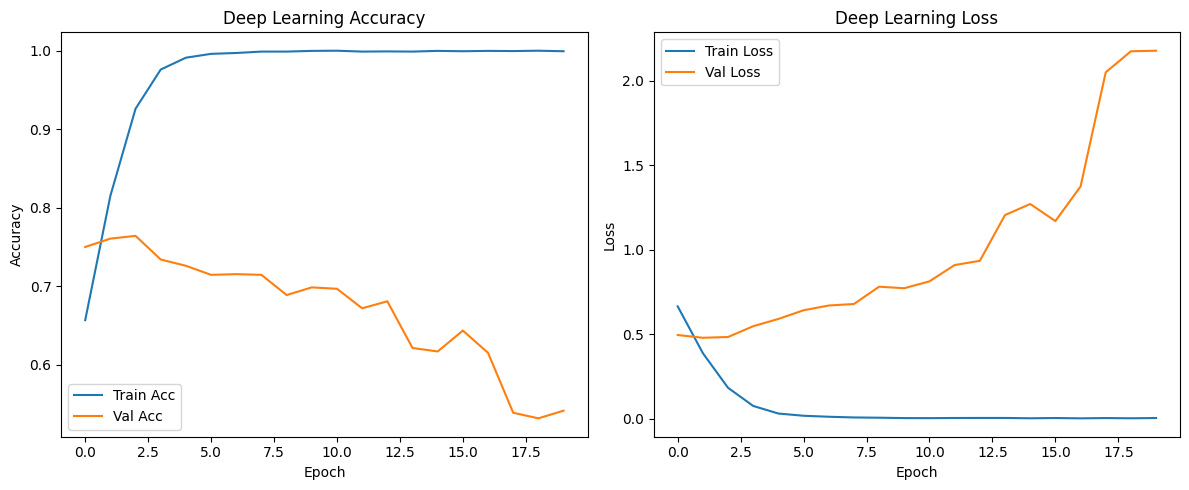

In [2]:
# Step 1: Install Required Library
!pip install -q textblob
from textblob import TextBlob

# Step 2: Import Modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 3: Load Dataset
# Replace with your dataset path or URL
churn_data = pd.read_csv('path_to_churn_data.csv')  # Replace this with your actual file

# Step 4: Preprocessing
churn_data.columns = churn_data.columns.str.strip().str.lower()  # clean column names
churn_data = churn_data.ffill()  # fill missing values

# Step 5: Add Dummy Feedback if Not Present
if 'customerfeedback' not in churn_data.columns:
    num_rows = len(churn_data)
    feedback_list = [
        "I am very unhappy with your service.",
        "Excellent customer support!",
        "Not satisfied. Wait times too long.",
        "Very helpful and responsive team.",
        "Terrible experience, never coming back.",
        "Absolutely loved the service!"
    ]
    churn_data['customerfeedback'] = feedback_list * (num_rows // len(feedback_list)) + feedback_list[:num_rows % len(feedback_list)]

# Step 6: Extract Sentiment
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

churn_data['sentimentscore'] = churn_data['customerfeedback'].apply(get_sentiment)

# Step 7: Drop Text Column
churn_data = churn_data.drop('customerfeedback', axis=1)

# Step 8: One-Hot Encode Categorical Features
print("Columns before one-hot encoding:", churn_data.columns)
original_target_col = 'churn'  # Replace if your actual target column name is different
churn_data = pd.get_dummies(churn_data, drop_first=True)
print("Columns after one-hot encoding:", churn_data.columns)

# Step 9: Separate Features and Target
target_col = original_target_col
if target_col not in churn_data.columns:
    for col in churn_data.columns:
        if original_target_col in col.lower():
            target_col = col
            print(f"Target column name adjusted to: '{target_col}'")
            break
    else:
        raise KeyError(f"Target column related to '{original_target_col}' not found.")

X_churn = churn_data.drop(target_col, axis=1)
y_churn = churn_data[target_col]

# Step 10: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_churn, y_churn, test_size=0.2, random_state=42)

# Step 11: Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 12: Train Logistic Regression Model
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred))
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, y_pred))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Step 13: Deep Learning Model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

dl_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

dl_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train Deep Learning model
history = dl_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate Deep Learning model
dl_loss, dl_accuracy = dl_model.evaluate(X_test, y_test)
print(f"\nDeep Learning Model Accuracy: {dl_accuracy:.4f}")

# Deep Learning Predictions
dl_y_pred_prob = dl_model.predict(X_test)
dl_y_pred = (dl_y_pred_prob > 0.5).astype(int)

print("\nDeep Learning Classification Report:\n", classification_report(y_test, dl_y_pred))
print("Deep Learning Confusion Matrix:\n", confusion_matrix(y_test, dl_y_pred))

# Step 14: Optional Training Plot
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Deep Learning Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Deep Learning Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
